<a href="https://colab.research.google.com/github/vimalkumarmdb/All_regression/blob/master/Final_projects_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load library

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

import matplotlib as mpl
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#!ls "/content/gdrive/My Drive/"


# Load the dataset


In [0]:
#df = pd.read_csv("our project data.csv")
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/our project data.csv')


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df['SalePrice'] = df['price']

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,SalePrice
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [0]:
df = df.drop(['price','id'],axis = 1)

In [9]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,SalePrice
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [0]:
df['Date'] = pd.to_datetime(df.date)

In [0]:
df = df.drop(['date'],axis = 1)

In [0]:
columns = df.columns.tolist()

In [13]:
columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'SalePrice',
 'Date']

In [0]:
cols = columns[-1:] + columns[:-1]
df = df[cols]

In [15]:
df.head()

,Date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,SalePrice
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [0]:
df = pd.DataFrame(np.round(df))

In [17]:
df.tail()

,Date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,SalePrice
21608,2014-05-21,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,48.0,-122.0,1530,1509,360000.0
21609,2015-02-23,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,48.0,-122.0,1830,7200,400000.0
21610,2014-06-23,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,48.0,-122.0,1020,2007,402101.0
21611,2015-01-16,3,2.0,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,48.0,-122.0,1410,1287,400000.0
21612,2014-10-15,2,1.0,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,48.0,-122.0,1020,1357,325000.0


In [18]:
df.isnull().sum()

Date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
SalePrice        0
dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


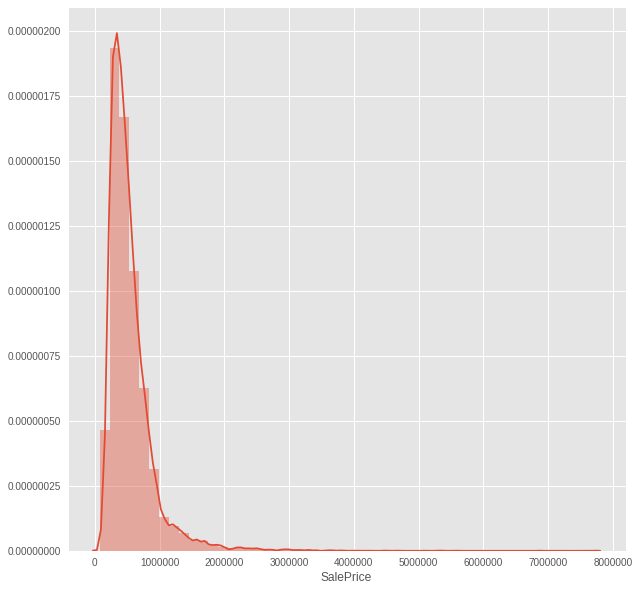

In [19]:
plt.figure(figsize = (10,10))
sns.distplot(df['SalePrice'])
plt.show()

In [20]:
print("Skewness:%f"%df['SalePrice'].skew())
print("Skewness:%f"%df['SalePrice'].kurt())

Skewness:4.024069
Skewness:34.585540


In [0]:
df['SalePrice'] = np.log(df['SalePrice'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


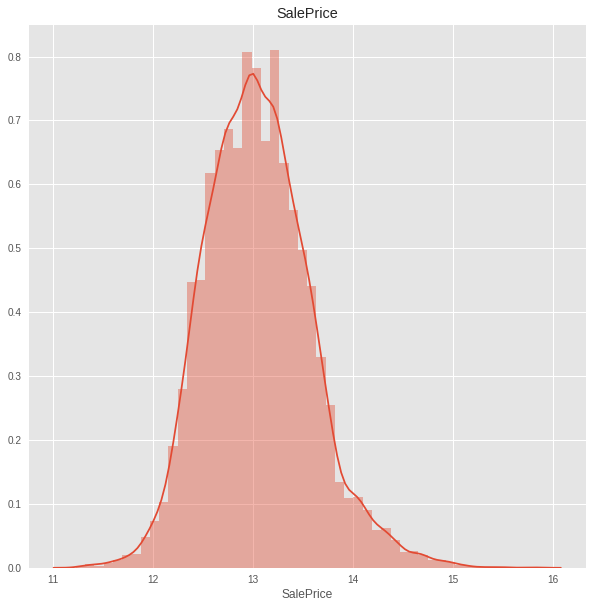

In [22]:
plt.figure(figsize = (10,10))
sns.distplot(df['SalePrice'])
plt.title("SalePrice")
plt.show()

In [0]:
from scipy import stats


# Feature exploration

In [0]:
data = pd.concat([df["sqft_living"], df["SalePrice"]],axis =1)

In [25]:
data.head()

,sqft_living,SalePrice
0,1180,12.309982
1,2570,13.195614
2,770,12.100712
3,1960,13.311329
4,1680,13.142166


<Figure size 720x576 with 0 Axes>

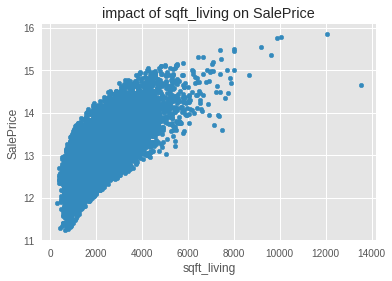

In [26]:
plt.figure(figsize=(10,8))
data.plot(kind = " scatter",  x = "sqft_living",y = "SalePrice")
plt.title("impact of sqft_living on SalePrice")
plt.show()

In [0]:
def remove_outlier(data):
    z = np.abs(stats.zscore(data))
    threshold = 3
    c =np.where(z > 3)
    data = data[(z < 3).all(axis=1)]
    return data


In [28]:
data0 = remove_outlier(data)
data0.head()

,sqft_living,SalePrice
0,1180,12.309982
1,2570,13.195614
2,770,12.100712
3,1960,13.311329
4,1680,13.142166


<Figure size 720x576 with 0 Axes>

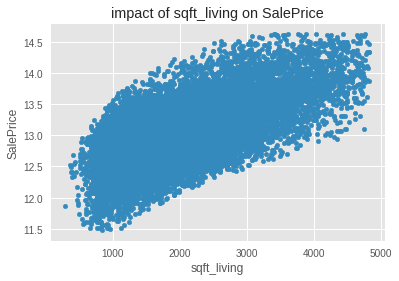

In [29]:
plt.figure(figsize=(10,8))
data0.plot(kind = " scatter",  x = "sqft_living",y = "SalePrice")
plt.title("impact of sqft_living on SalePrice")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


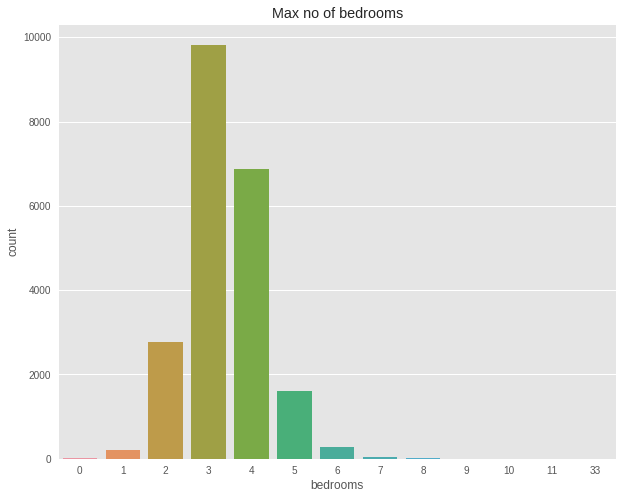

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(10,8))
sns.countplot( df['bedrooms'])
plt.title("Max no of bedrooms")
plt.show()
plt.savefig("F:\\Machine_learning_IBM\\bedroom.png")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


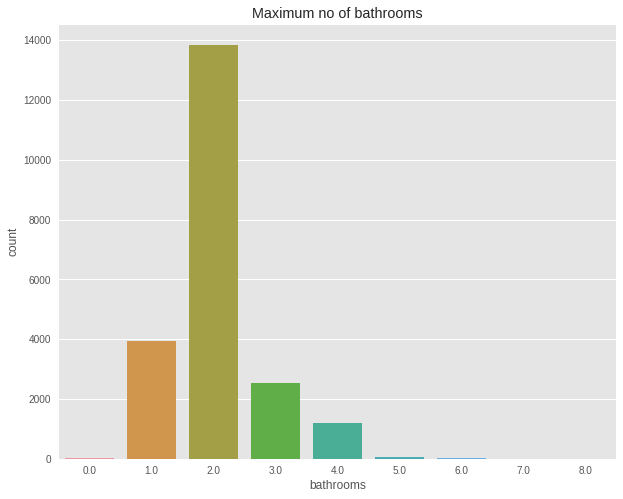

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(df['bathrooms'])
plt.title("Maximum no of bathrooms")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


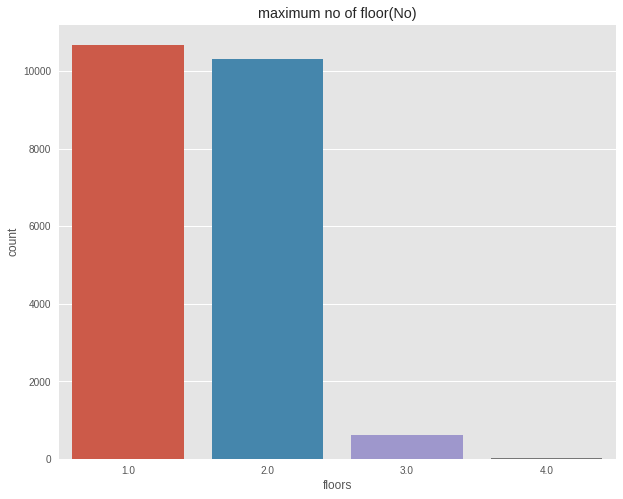

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(df['floors'])
plt.title("maximum no of floor(No)")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


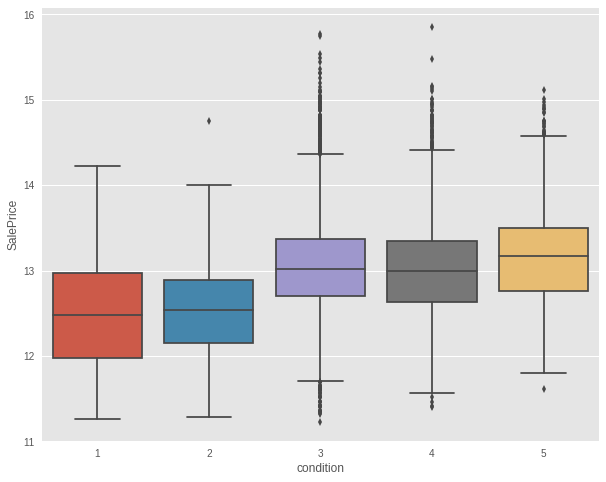

In [33]:
plt.figure(figsize=(10,8))
data2 =pd.concat([df['condition'],df["SalePrice"]],axis = 1)
sns.boxplot(x = data2['condition'],y =data2['SalePrice'] )
plt.show()

In [0]:
def remove_outlier_catego(data):
    z = np.abs(stats.zscore(data))
    threshold = 2
    c =np.where(z > 2)
    data = data[(z < 2).all(axis=1)]
    return data


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


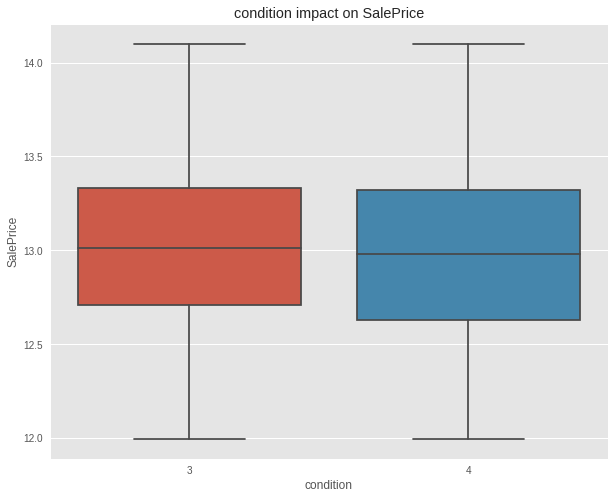

In [35]:
data3 = remove_outlier_catego(data2)
plt.figure(figsize=(10,8))
sns.boxplot(x = data3['condition'],y =data3['SalePrice'] )
plt.title('condition impact on SalePrice')
plt.show()

In [36]:
data4 =pd.concat([df['view'],df["SalePrice"]],axis = 1)
data4.head()

,view,SalePrice
0,0,12.309982
1,0,13.195614
2,0,12.100712
3,0,13.311329
4,0,13.142166


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


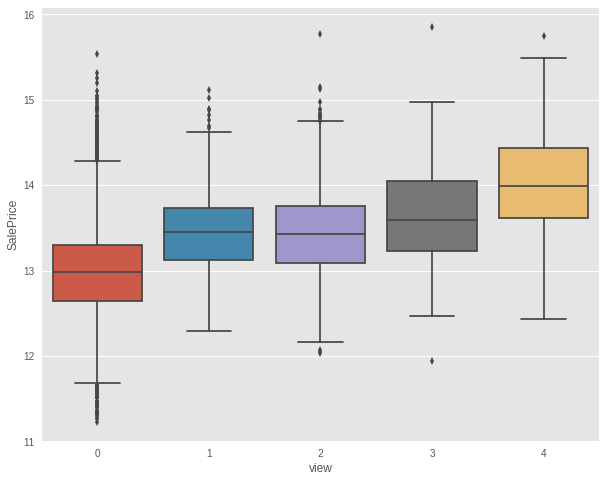

In [37]:
plt.figure(figsize=(10,8))
sns.boxplot(x = data4['view'],y =data4['SalePrice'] )
plt.show()

In [0]:
def remove_outlier_catego(data):
    z = np.abs(stats.zscore(data))
    threshold = 2
    c =np.where(z > 2)
    data = data[(z < 2).all(axis=1)]
    return data

In [0]:
data4 = remove_outlier_catego(data4)

In [40]:
data4.head()

,view,SalePrice
0,0,12.309982
1,0,13.195614
2,0,12.100712
3,0,13.311329
4,0,13.142166


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


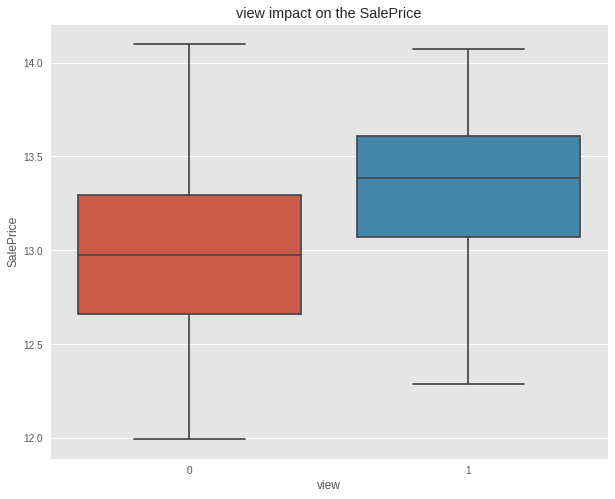

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(x = data4['view'],y =data4['SalePrice'] )
plt.title("view impact on the SalePrice")
plt.show()

In [42]:
data5 =pd.concat([df['grade'],df["SalePrice"]],axis = 1)
data5.head()

,grade,SalePrice
0,7,12.309982
1,7,13.195614
2,6,12.100712
3,7,13.311329
4,8,13.142166


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


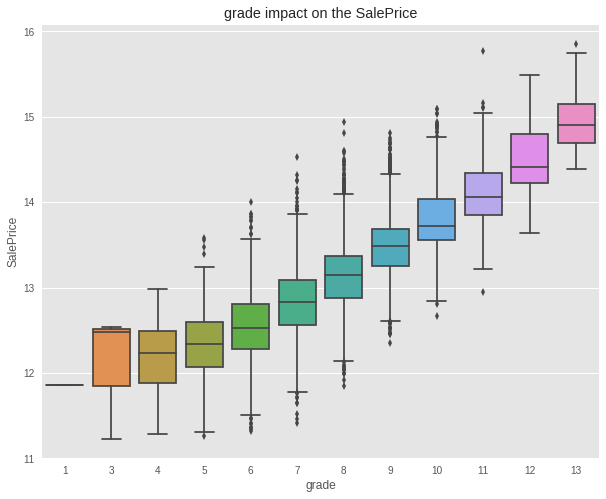

In [43]:
plt.figure(figsize=(10,8))
sns.boxplot(x = data5['grade'],y =data5['SalePrice'] )
plt.title("grade impact on the SalePrice")
plt.show()

In [0]:
data4 =pd.concat([df['view'],df["SalePrice"]],axis = 1)

In [0]:
def remove_outlier_catego(data):
    z = np.abs(stats.zscore(data))
    threshold = 1
    c =np.where(z > 1)
    data = data[(z < 1).all(axis=1)]
    return data

In [0]:
data5 = remove_outlier_catego(data5)

In [47]:
data5.head()

,grade,SalePrice
1,7,13.195614
3,7,13.311329
4,8,13.142166
7,7,12.583995
9,7,12.685408


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


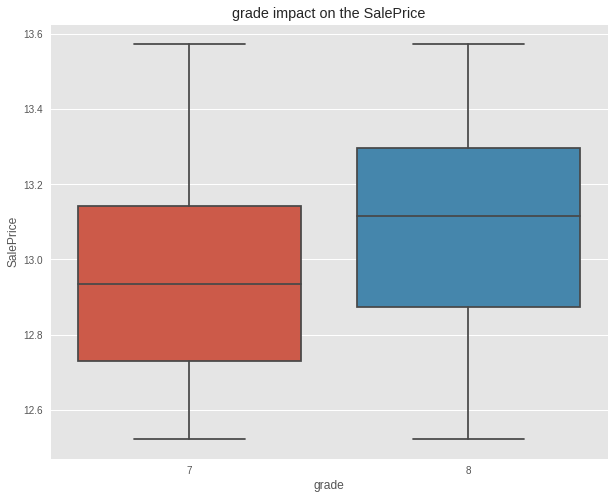

In [48]:
plt.figure(figsize=(10,8))
sns.boxplot(x = data5['grade'],y = data5['SalePrice'])
plt.title("grade impact on the SalePrice")
plt.show()

In [49]:
data6 =pd.concat([df['sqft_above'],df["SalePrice"]],axis = 1)
data6.head()

,sqft_above,SalePrice
0,1180,12.309982
1,2170,13.195614
2,770,12.100712
3,1050,13.311329
4,1680,13.142166


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


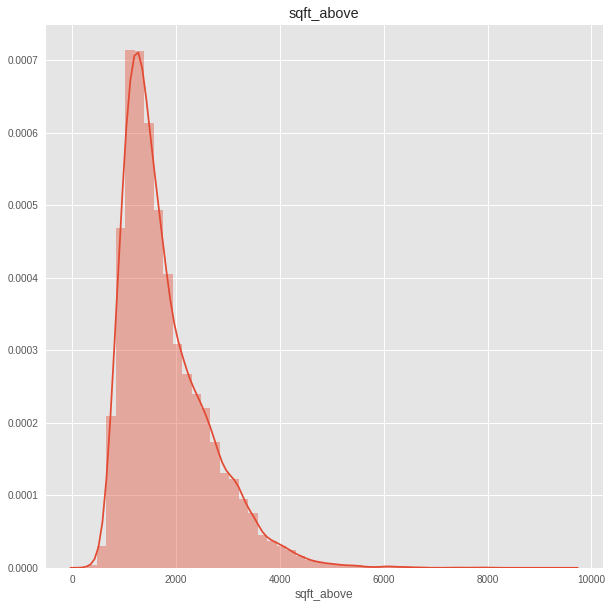

In [50]:
plt.figure(figsize = (10,10))
sns.distplot(data6['sqft_above'])
plt.title("sqft_above")
plt.show()

In [51]:
print("Skewness:%f"%data6['sqft_above'].skew())
print("Skewness:%f"%data6['sqft_above'].kurt())

Skewness:1.446664
Skewness:3.402304


In [52]:
data6['sqft_above'] = np.log(df['sqft_above'])
data6.head()

,sqft_above,SalePrice
0,7.073270,12.309982
1,7.682482,13.195614
2,6.646391,12.100712
3,6.956545,13.311329
4,7.426549,13.142166


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


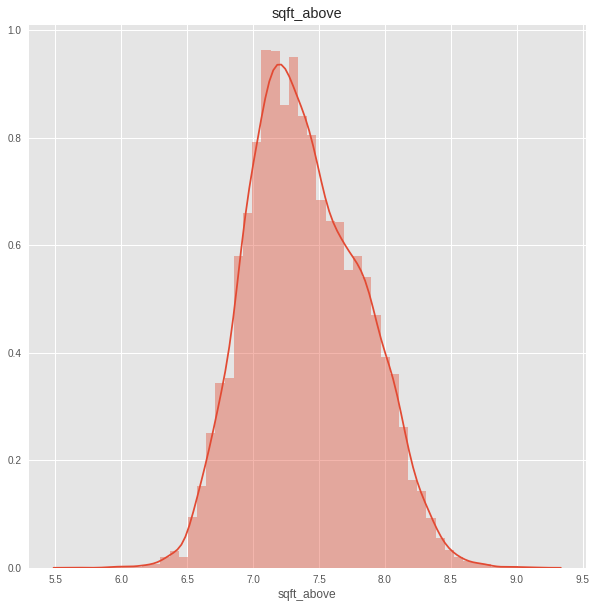

In [53]:
plt.figure(figsize = (10,10))
sns.distplot(data6['sqft_above'])
plt.title("sqft_above")
plt.show()

In [0]:
def remove_outlier_catego(data):
    z = np.abs(stats.zscore(data))
    threshold = 0.5
    c =np.where(z > 0.5)
    data = data[(z < 0.5).all(axis=1)]
    return data

In [55]:
data6['sqft_above'] = np.log(df['sqft_above'])
data6 = remove_outlier_catego(data6)
data6.head()

,sqft_above,SalePrice
4,7.426549,13.142166
13,7.222566,12.899220
14,7.501082,13.180632
16,7.544332,12.886641
17,7.377759,13.091904


In [56]:
data6['sqft_above'].min()
data6['sqft_above'].max()

7.605890001053122

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


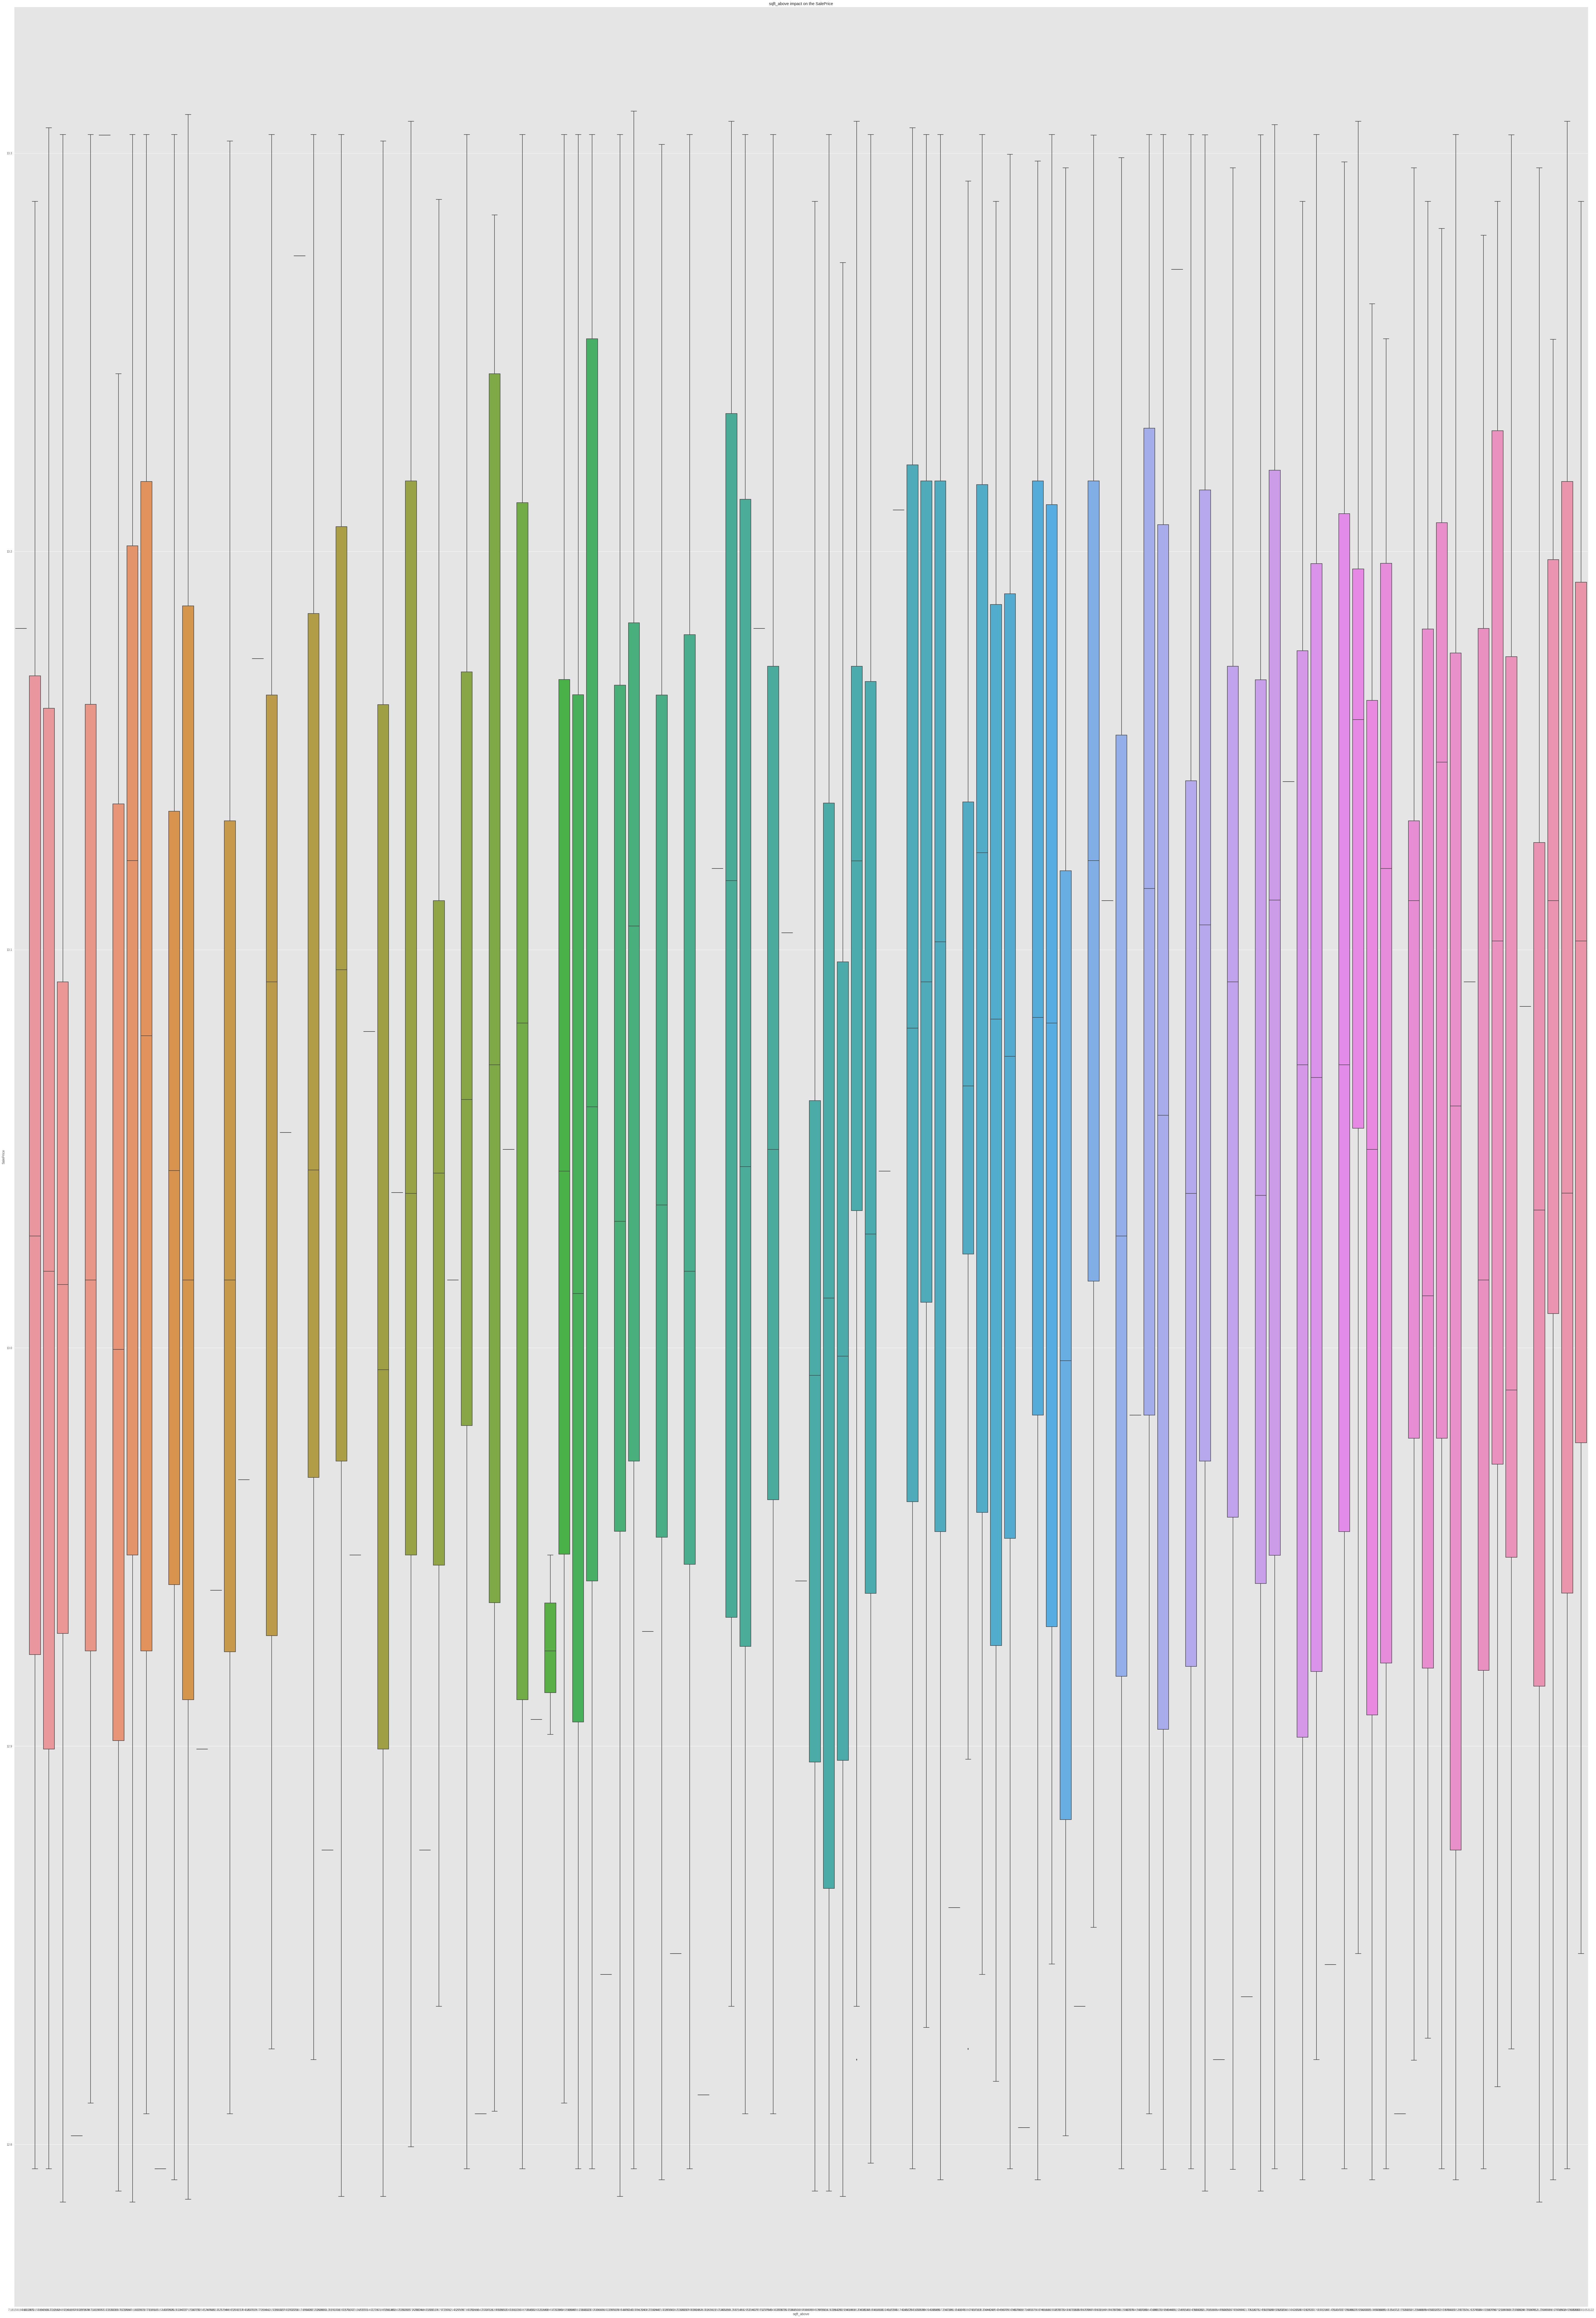

In [58]:
plt.figure(figsize=(100,150))
sns.boxplot(data6['sqft_above'],data6['SalePrice'])
plt.title("sqft_above impact on the SalePrice")
#plt.xlim([])
plt.show()